In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from encoder import Encoder
import k2
import sentencepiece as spm
device = "cuda:0"

In [24]:
encoder = Encoder(num_features=80, channels=256, channels_expansion=1024, dilations=[1 for _ in range(11)], kernel_size=8,
                  activation='ReLU', se_activation='ReLU', scaled_conv=True, act_bal=True, se_gate='tanh', zero_init_residual=True,
                  gamma=0.93, chunksize=16, output_channels=512)
checkpoint = torch.load("korean/vocab500_ipa3_noemawd_l11_customfbank_adamw/epoch-10.pt")
new_checkpoint = dict()
for name, param in checkpoint["model"].items():
    if name.startswith("encoder"):
        new_checkpoint[name[len("encoder."):]] = param
encoder.load_state_dict(new_checkpoint)
encoder.to(device)
batch = torch.load("korean/vocab500_ipa3_noemawd_l11_customfbank_adamw/batch-8d62d777-8090-c4bd-d6a7-4dbe3e572e0f.pt")

In [ ]:
sp = spm.SentencePieceProcessor()
sp.load("/home/shahn/Documents/icefall_github/egs/ksponspeech/ASR/data/lang_bpe_500_ipa_max3/bpe.model")

In [25]:
y = sp.encode(batch["supervisions"]["custom.ipa_filtered"], out_type=int)
y = k2.RaggedTensor(y).to(device)
with torch.cuda.amp.autocast():
    out = encoder(batch["inputs"].to(device), batch["supervisions"]["num_frames"].to(device))

-1.0416722 1.0774716


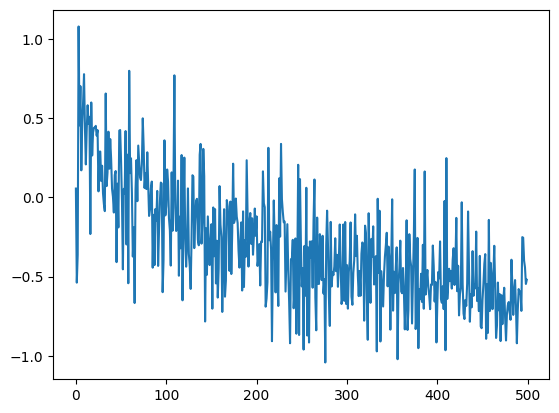

In [44]:
checkpoint = torch.load("korean/vocab500_ipa3_l11_customfbank_adamp_wd1e-2/epoch-200.pt")
x = checkpoint["model"]["joiner.output_linear.bias"].cpu().numpy()[:]
print(x.min(), x.max())
plt.plot(x)
# plt.ylim(-0.2, x.max()*1.1)
plt.show()